# Statistical Thinking in Python

## 1. Parameter estimation by optimization

When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. In this chapter, you will learn how to find the optimal parameters, those that best describe your data.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

In [6]:
## Exploratory data analysis
# import pandas as pd 
url = 'https://assets.datacamp.com/production/repositories/469/datasets/df23780d215774ff90be0ea93e53f4fb5ebbade8/michelson_speed_of_light.csv'
speed_of_light = pd.read_csv(url)
speed_of_light.head(1)

Unnamed: 0     date  distinctness of image  temperature (F)  \
0           0  June  5                      3               76   

   position of deflected image  position of slit  \
0                       114.85               0.3   

  displacement of image in divisions difference between greatest and least  \
0                             114.55                                  0.17   

       B    Cor revolutions per second  radius (ft)  \
0  1.423 -0.132                 257.36       28.672   

   value of one turn of screw  velocity of light in air (km/s)  \
0                     0.99614                           299850   

           remarks  
0  Electric light.

### Empirical cumulative distribution function (ECDF)

In [8]:
#import numpy as np

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

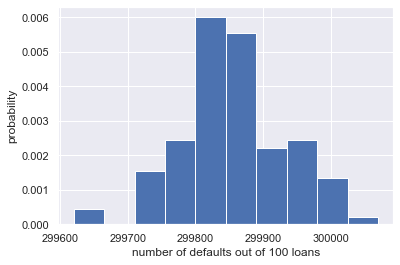

In [10]:
import warnings
warnings.filterwarnings("ignore")
sns.set()

# Plot the histogram with default number of bins; label your axes
michelson_speed_of_light = speed_of_light['velocity of light in air (km/s)']

_ = plt.hist(michelson_speed_of_light, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

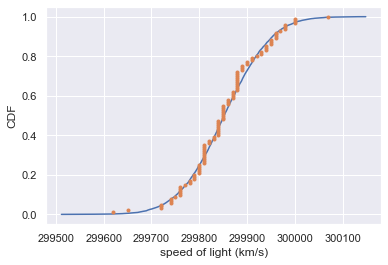

In [11]:
#import matplotlib.pyplot as plt
#import seaborn as sns

mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)

samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(michelson_speed_of_light)
x_theor, y_theor = ecdf(samples)

sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')
plt.show()

In [13]:
url = 'https://assets.datacamp.com/production/repositories/470/datasets/593c37a3588980e321b126e30873597620ca50b7/mlb_nohitters.csv' 
nohitters = pd.read_csv(url)

display(nohitters.head(3))

nohitter_times = nohitters['game_number']

date  game_number winning_team losing_team winning_pitcher
0  18760715          140          NaN         NaN             NaN
1  18800612         1035          NaN         NaN             NaN
2  18800617         1046          NaN         NaN             NaN

### How often do we get no-hitters?
The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call $\tau$, the typical interval time. The value of the parameter $\tau$ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

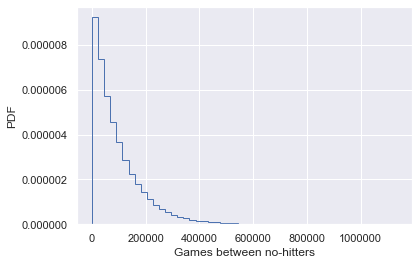

In [14]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

### Do the data follow our story?

You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

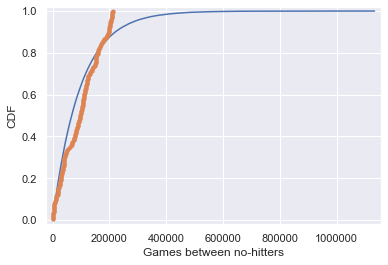

In [15]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

### How is this parameter optimal?

Now sample out of an exponential distribution with $\tau$ being twice as large as the optimal $\tau$. Do it again for $\tau$ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the $\tau$ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

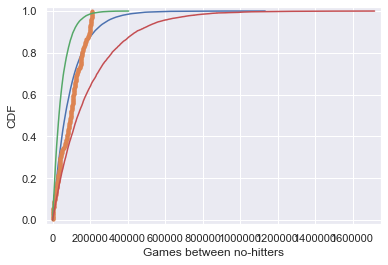

In [16]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

### EDA of literacy/fertility data
In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array illiteracy has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.

In [18]:
url = 'https://assets.datacamp.com/production/repositories/470/datasets/f1e7f8a98c18da5c60b625cb8af04c3217f4a5c3/female_literacy_fertility.csv' 
female_literacy_fertility = pd.read_csv(url)
display(female_literacy_fertility.head(3))

illiteracy = female_literacy_fertility['female literacy']
fertility = female_literacy_fertility['fertility']

Country  Continent  female literacy  fertility     population
0    Chine       ASI             90.5      1.769  1,324,655,000
1     Inde       ASI             50.8      2.682  1,139,964,932
2      USA       NAM             99.0      2.077    304,060,000

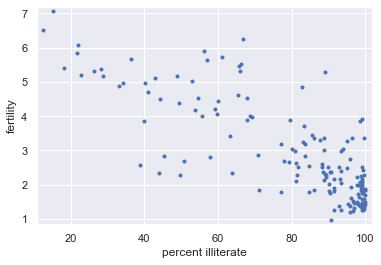

(-0.8041324026815344, 5.635092985976836e-38)


In [19]:
from scipy.stats.stats import pearsonr

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearsonr(illiteracy, fertility))

You can see the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

slope = -0.049798548090634234 children per woman / percent illiterate
intercept = 6.8679054196999765 children per woman


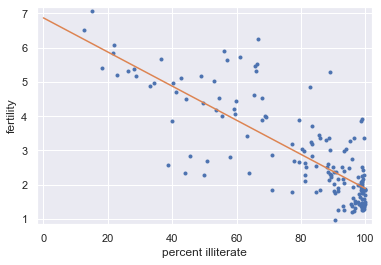

In [20]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')
plt.margins(0.02)

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(x=illiteracy, y=fertility, deg=1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

In [21]:
print([a, b])

[-0.049798548090634234, 6.8679054196999765]


### How is it optimal?
The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

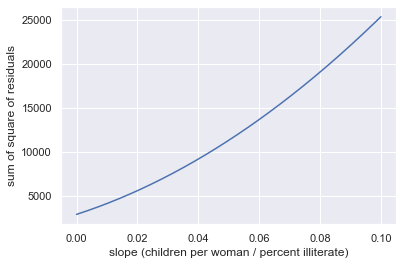

In [22]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0,0.1,200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

### The importance of EDA: Anscombe's quartet

In [24]:
url='https://assets.datacamp.com/production/repositories/470/datasets/fe820c6cbe9bcf4060eeb9e31dd86aa04264153a/anscombe.csv'
anscombe = pd.read_csv(url, header=1)
anscombe.head(3)

x     y   x.1   y.1   x.2    y.2  x.3   y.3
0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
2  13.0  7.58  13.0  8.74  13.0  12.74  8.0  7.71

In [37]:
x = anscombe['x']
x_1=anscombe['x.1']
x_2=anscombe['x.2']
x_3=anscombe['x.3']

y = anscombe['y']
y_1=anscombe['y.1']
y_2=anscombe['y.2']
y_3=anscombe['y.3']

# Perform linear regression: a, b
def compute_coef(x,y):
    a, b = np.polyfit(x,y, deg=1)
    return a,b

a, b = compute_coef(x,y)
a_1, b_1 = compute_coef(x_1,y_1)
a_2, b_2 = compute_coef(x_2,y_2)
a_3, b_3 = compute_coef(x_3,y_3)


print('slope:', a,   'intercept:', b)
print('slope:', a_1, 'intercept:', b_1)
print('slope:', a_2, 'intercept:', b_2)
print('slope:', a_3, 'intercept:', b_3)

slope: 0.5000909090909095 intercept: 3.0000909090909076
slope: 0.5000000000000004 intercept: 3.000909090909089
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.49990909090909064 intercept: 3.0017272727272735


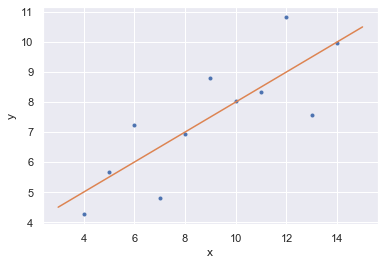

In [32]:
# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

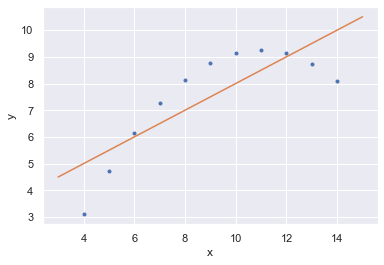

In [33]:
# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a_1 * x_theor + b_1

# Plot the Anscombe data and theoretical line
_ = plt.plot(x_1, y_1, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

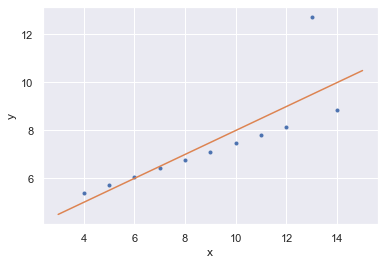

In [34]:
# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a_2 * x_theor + b_2

# Plot the Anscombe data and theoretical line
_ = plt.plot(x_2, y_2, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

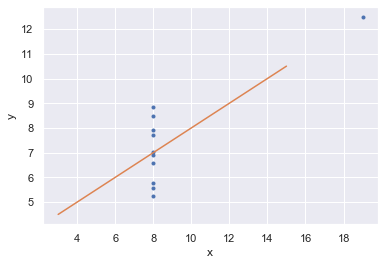

In [35]:
# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a_3 * x_theor + b_3

# Plot the Anscombe data and theoretical line
_ = plt.plot(x_3, y_3, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [26]:
# an easier way to compare
anscombe_x =[anscombe['x'], anscombe['x.1'], anscombe['x.2'], anscombe['x.3']]
anscombe_y =[anscombe['y'], anscombe['y.1'], anscombe['y.2'], anscombe['y.3']]

# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y, deg=1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.0000909090909076
slope: 0.5000000000000004 intercept: 3.000909090909089
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.49990909090909064 intercept: 3.0017272727272735


## 2. Bootstrap confidence intervals

In [40]:
#import numpy as np
np.random.choice([1,2,3,4,5], size=5) # without replacement sampling 

bs_sample = np.random.choice(michelson_speed_of_light, size=100)

print(np.mean(bs_sample))
print(np.median(bs_sample))
print(np.std(bs_sample))

299848.0
299840.0
84.30895563343196


### Visualizing bootstrap samples
In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. 

In [41]:
#import pandas as pd 
url = 'https://assets.datacamp.com/production/repositories/470/datasets/129cba08c45749a82701fbe02180c5b69eb9adaf/sheffield_weather_station.csv'
rainfall_data = pd.read_csv(url, header=8,  sep='\s+')
display(rainfall_data.head())
rainfall = rainfall_data['rain']

yyyy  mm  tmax  tmin  af   rain  sun
0  1883   1   6.3   1.7   6  122.1  ---
1  1883   2   8.0   2.8   2   69.8  ---
2  1883   3   4.8  -1.6  23   29.6  ---
3  1883   4  12.2   3.8   2   74.0  ---
4  1883   5  14.7   6.2   0   31.2  ---

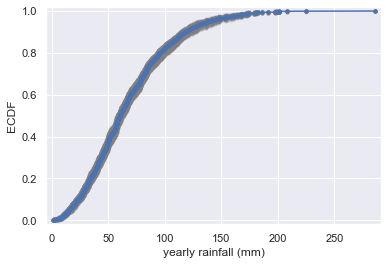

In [42]:
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

 Notice how the bootstrap samples give an idea of how the distribution of rainfalls is spread.
 
 ### Bootstrap replicate function

In [43]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [44]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299852.6

In [45]:
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

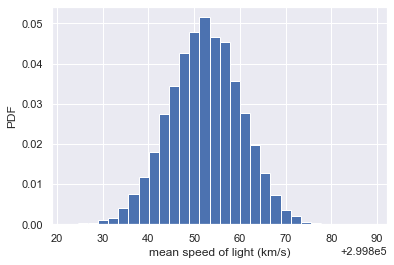

In [46]:
_ = plt.hist(bs_replicates, bins=30, normed=True)
_ = plt.xlabel('mean speed of light (km/s)')
_ = plt.ylabel('PDF')
plt.show()

In [47]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([299836.9, 299867.6])

### Generating many bootstrap replicates
Now you'll write another function, `draw_bs_reps(data, func, size=1)`, which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

In [48]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

### Bootstrap replicates of the mean and the SEM
In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

0.9488593574676786
0.9433352171656226


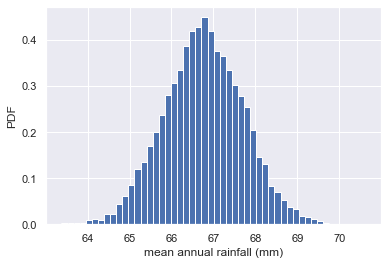

In [49]:
import numpy as np

import warnings
warnings.filterwarnings("ignore")

sns.set()

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [50]:
# confidence interval on the mean 
np.percentile(bs_replicates, [2.5, 97.5])

array([64.93070381, 68.62991885])

Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

### Bootstrap replicates of other statistics
We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

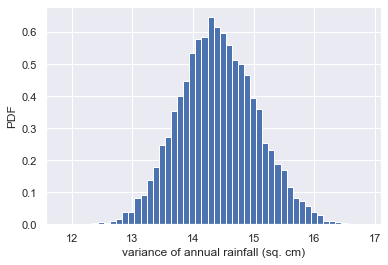

In [51]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates=bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, normed=True, bins=50)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [52]:
# Note that you can also compute a confidence interval on the variance
np.percentile(bs_replicates, [2.5, 97.5])

array([13.19028343, 15.71577052])

### Confidence interval on the rate of no-hitters
Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter $\tau$. Plot a histogram of your replicates and report a 95% confidence interval.

95% confidence interval = [ 89293.74778912 104129.60161565] games


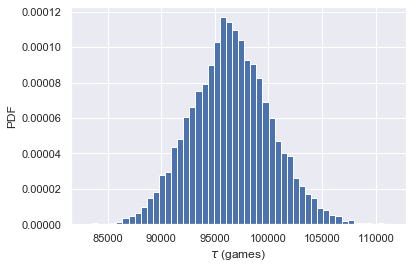

In [53]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


#### Pairs bootstrap for linear regression
1. Resample data in pairs
2. Compute slope and intercept from resampled data
3. Each slope and intercept is a bootstrap replicate
4. Compute condence intervals from percentiles of bootstrap replicates

##### A function to do pairs bootstrap
Pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using `np.polyfit()`. We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of x,y data.

In [55]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

### Pairs bootstrap of literacy/fertility data
Using the function you just wrote, perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays illiteracy and fertility.

[-0.0550896  -0.04438978]


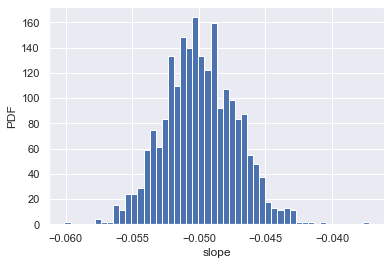

In [56]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

### Plotting bootstrap regressions

A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. 

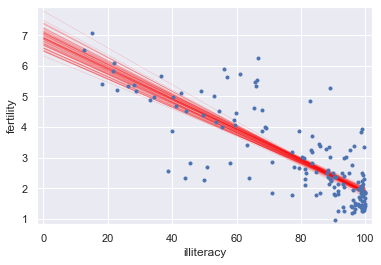

In [57]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()